In [160]:

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
from scipy.stats import randint
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, StackingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import numpy as np
from scipy.special import boxcox1p
from scipy.stats import skew
#import some necessary librairies

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


rtree = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16,random_state=42 , n_jobs=-1 )
lg = LogisticRegression(solver="lbfgs", random_state=42)
bg_svc = BaggingClassifier( n_estimators = 500 , n_jobs=-1 , bootstrap = True )

from copy import deepcopy
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [161]:
train_data = pd.read_csv("hotel_guests_dataset.csv")
print(train_data.shape)

id = train_data.loc[:,'Unnamed: 0']

train_data.drop("Unnamed: 0", axis = 1, inplace = True)


pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)


#classification
y = train_data.room_type.values
#regression
y_train = train_data.room_rate.values

(2000, 10)


In [162]:
train_data

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,dsullivan@example.net,False,BASIC,8.324971,04 Apr 2020,23 Apr 2020,146.834507,"90469 Karla Knolls Apt. 781\nSusanberg, NC 28401",5161033759518983
1,steven59@example.org,False,BASIC,NaN,27 Jun 2020,16 Aug 2020,185.497813,"1080 Ashley Creek Apt. 622\nWest Amy, NM 25058",4133047413145475690
2,brandon15@example.net,False,BASIC,22.269158,13 Apr 2020,07 Apr 2020,151.115528,"99923 Anderson Trace Suite 861\nNorth Haley, T...",4977328103788
3,humphreyjennifer@example.net,False,BASIC,25.468647,22 May 2020,08 Jun 2020,182.468031,"9301 John Parkways\nThomasland, OH 61350",3524946844839485
4,joshuabrown@example.net,False,BASIC,19.778311,14 Nov 2019,27 Oct 2019,195.497743,"126 George Tunnel\nDuranstad, MS 95176",4446905799576890978
5,moondavid@example.com,False,BASIC,NaN,30 Oct 2020,17 Nov 2020,88.247232,"812 Kimberly Forges\nEast Brianafurt, AR 16834",4265310195602383
6,patty61@example.com,False,BASIC,16.670851,07 Oct 2020,30 Aug 2020,83.800000,7999 Sheila Forges Apt. 089\nWest Briannahaven...,30279530784085
7,michellehill@example.net,False,SUITE,13.991605,01 Sep 2020,28 Aug 2020,204.266982,79445 Brandon Plains Apt. 024\nPort Cynthiapor...,2285102384715773
8,loganosborne@example.org,False,BASIC,18.410008,09 Sep 2020,04 Sep 2020,128.384707,"522 Davis Street\nNew Cole, AZ 17369",3541571714584497
9,gkey@example.org,False,BASIC,27.616677,20 Oct 2020,22 Nov 2020,217.617926,"77972 Wendy Lake Apt. 933\nKelseyhaven, WI 35555",676377598427


In [163]:
train_data.isna().sum()

guest_email             0
has_rewards             0
room_type               0
amenities_fee         184
checkin_date            0
checkout_date          69
room_rate               0
billing_address         0
credit_card_number      0
dtype: int64

In [164]:
import pandas as pd

mode_values1 = train_data.groupby('room_type').agg(
    mode=('amenities_fee', lambda x: x.mode().iat[0] if not x.mode().empty else 'Unknown'),
    median=('amenities_fee', 'median'),
    mean=('amenities_fee', 'mean')
).reset_index()

mode_values1

def fill_Nans2(df, mode_value , column_guide, column_nans):
    
    
    for index, row in df.iterrows():
        
        
        if pd.isna(row[column_nans]) and row[column_guide] in mode_value[column_guide].values:
            
            df.loc[index, column_nans] = mode_value.loc[mode_value[column_guide] == row[column_guide], 'median'].values[0]
            
fill_Nans2(train_data,mode_values1,'room_type','amenities_fee')            

In [165]:
train_data['checkin_date'] = pd.to_datetime(train_data['checkin_date'], format='%d %b %Y')
train_data['checkout_date'] = pd.to_datetime(train_data['checkout_date'], format='%d %b %Y')

# Calculate the length of stay for rows with both checkin_date and checkout_date
train_data['length_of_stay'] = (train_data['checkout_date'] - train_data['checkin_date']).dt.days.abs()

min_date = train_data['checkin_date'].min() - pd.Timedelta(days=30)
max_date = train_data['checkin_date'].max() + pd.Timedelta(days=30)
period_bins = pd.date_range(start=min_date, end=max_date, freq='1M')

train_data['check_period'] = pd.cut(train_data['checkin_date'], bins=period_bins, include_lowest=True, right=True)

print(train_data['check_period'].isna().sum())

mode_values2 = train_data.groupby('check_period').agg(
    mode=('length_of_stay', lambda x: x.mode().iat[0] if not x.mode().empty else 'Unknown'),
    median=('length_of_stay', lambda x: x.median() if not pd.isna(x.median()) else 'Unknown'),
    mean=('length_of_stay', lambda x: x.mean() if not pd.isna(x.mean()) else 'Unknown')
).reset_index()

mode_values2

fill_Nans2(train_data,mode_values2,'check_period','length_of_stay')

0


In [166]:
  for index, row in train_data.iterrows():
        
        if pd.isna(row['checkout_date']):
            
            train_data.loc[index, 'checkout_date'] = row['checkin_date'] + pd.Timedelta(days=row['length_of_stay'])

In [167]:
print(train_data.dtypes)

guest_email                   object
has_rewards                     bool
room_type                     object
amenities_fee                float64
checkin_date          datetime64[ns]
checkout_date         datetime64[ns]
room_rate                    float64
billing_address               object
credit_card_number             int64
length_of_stay               float64
check_period                category
dtype: object


### feature enginnering the data and adding a new column that helps performance in case of regression but not in classifcation 

In [168]:


train_data['checkin_date'] = train_data['checkin_date'].apply(lambda x: x.timestamp())
train_data['checkout_date'] = train_data['checkout_date'].apply(lambda x: x.timestamp())
train_data = train_data.drop(['credit_card_number', 'guest_email','billing_address'],axis=1)

In [169]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

cols = ('has_rewards','room_type','checkout_date','checkin_date','check_period')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train_data[c].values)) 
    train_data[c] = lbl.transform(list(train_data[c].values))
    


 mu = 156.40 and sigma = 50.78



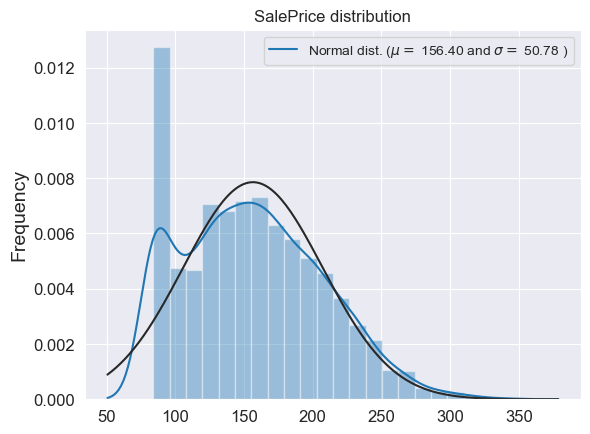

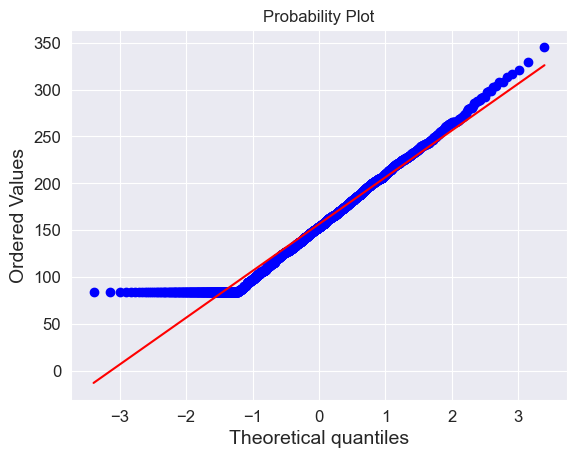

In [170]:
train_dfx = train_data

sns.distplot( y_train , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()


 mu = 5.01 and sigma = 0.33



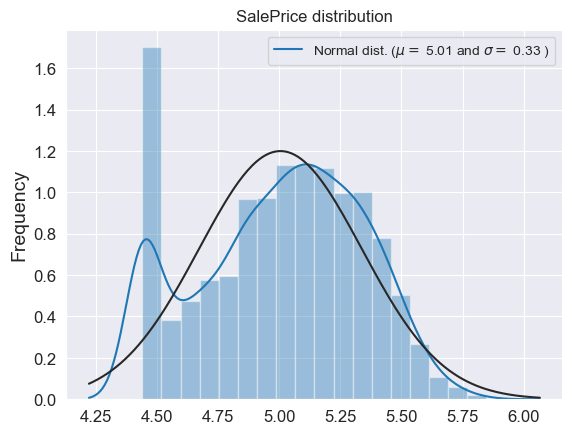

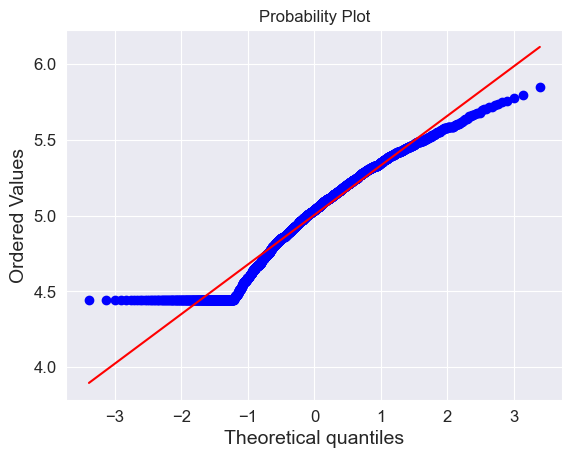

In [171]:
y_train = np.log1p(y_train)
#Check the new distribution 
sns.distplot(y_train , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_train)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show()

In [172]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

# Check the skew of all numerical features
skewed_feats = train_dfx[numerical_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness



Skew in numerical features: 



,Skew
has_rewards,1.670269
length_of_stay,1.048694
room_rate,0.407917
amenities_fee,0.219083
checkout_date,0.047294
checkin_date,-0.047835


In [173]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Yeo-Johnson transform".format(skewness.shape[0]))

from scipy.stats import yeojohnson
skewed_features = skewness.index
for feat in skewed_features:
    train_dfx[feat], _ = yeojohnson(train_dfx[feat])
    
train_dfx = pd.get_dummies(train_dfx)
train_dfx = train_dfx.drop('room_rate',axis=1)

There are 6 skewed numerical features to Yeo-Johnson transform


In [174]:
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_dfx.values)
    rmse= np.sqrt(-cross_val_score(model, train_dfx, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [180]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


n_folds = 5



lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

SVR = make_pipeline( StandardScaler() , svr_model )

rnd_clf = RandomForestRegressor(n_estimators=3000, random_state=42)

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)

score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


score = rmsle_cv(ENet)
print("\nENet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


score = rmsle_cv(SVR)
print("\nSVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("\nKRR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("\nGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Lasso score: 0.3081 (0.0063)


ENet score: 0.3081 (0.0063)


SVR score: 0.3092 (0.0068)



In [177]:
from scipy.stats import loguniform, uniform, reciprocal
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer

x_train ,x_test ,y_t , y_test = train_test_split(train_dfx,y_train,test_size=0.2,random_state=42)


def rmse_scorer(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return -rmse  # Use negative value since greater is better for scorers

rmse_scoring = make_scorer(rmse_scorer)

Parms = {
    'svr__kernel': [ 'linear','poly', 'rbf'],
    'svr__C': loguniform(0.00001, 100.0),
    'svr__degree': randint(1, 10),
    'svr__gamma': reciprocal(0.0001, 1),
    'svr__coef0': uniform(-1, 1),
}
 
full_pip = Pipeline([
    ('std',StandardScaler()),
    ('svr',SVR())
])

rnd_search = RandomizedSearchCV(
    full_pip, Parms, n_iter=100 , cv=5, random_state=42, n_jobs=-1, scoring="neg_mean_squared_error", verbose=3,
)

rndx = rnd_search.fit(x_train, y_t)


pred_train = rndx.predict(x_train)
mse = mean_squared_error(y_t, pred_train)
rmse_train = np.sqrt(mse)

pred_test = rndx.predict(x_test)
mse = mean_squared_error(y_test, pred_test)
rmse_test = np.sqrt(mse)


best_rmse = -rnd_search.best_score_

print('Train set RMSE:', rmse_train)
print('Test set RMSE:', rmse_test)
print('Cross-validation RMSE:', best_rmse) 

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Train set RMSE: 0.30864997579308895
Test set RMSE: 0.30713320804413885
Cross-validation RMSE: 0.0963986614125241


In [178]:
cleaned_best_params = {key.replace("svr__", ""): value for key, value in rndx.best_params_.items()}
print("Cleaned best parameters:\n", cleaned_best_params)


svr_model = SVR(**cleaned_best_params)

Cleaned best parameters:
 {'C': 0.006295450333384249, 'coef0': -0.9533343367863846, 'degree': 3, 'gamma': 0.0033872555658521473, 'kernel': 'linear'}


### classifcation problem pred

In [181]:
import pandas as pd

train_dfx2 = train_dfx.drop('room_type',axis=1)

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X_train,X_test, Y_train, Y_test = train_test_split(train_dfx2 ,y, test_size=0.3, random_state=100)

rfmodel=RandomForestClassifier()
rfmodel.fit(X_train, Y_train)
rfpred = rfmodel.predict(X_test)


gbmodel=GradientBoostingClassifier()
gbmodel.fit(X_train, Y_train)
gbpred = gbmodel.predict(X_test)

print("Accuracy of RandomForestClassifier : ",accuracy_score(Y_test, rfpred))
print("Accuracy of XGBClassifier : ",accuracy_score(Y_test, gbpred))

Accuracy of RandomForestClassifier :  0.8833333333333333
Accuracy of XGBClassifier :  0.89


In [184]:
# Fit the RandomForestClassifier model
rfmodel.fit(X_train, Y_train)

# Get feature importances
importances = rfmodel.feature_importances_

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({"Feature": train_dfx2.columns, "Importance": importances})
feature_importances = feature_importances.sort_values("Importance", ascending=False)

print(feature_importances)

          Feature  Importance
1   amenities_fee    0.276941
3   checkout_date    0.224524
2    checkin_date    0.222427
4  length_of_stay    0.174506
5    check_period    0.075248
0     has_rewards    0.026354


In [ ]:
Accuracy of RandomForestClassifier :  0.885
Accuracy of XGBClassifier :  0.88